<a href="https://colab.research.google.com/github/billiahkerubo1/Autolib/blob/main/Analysis_on_Autolib_Electric_car_sharing_services.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Defining the Question

a.) Specifying the question: The problem statement in this study is to determine why there is a difference between the bluecars taken and the bluecars returned.

b.) Defining the metric for success: The more the number of the cars are returned, the more the data points awarded. This will encourage the cars to be returned and the solution is found for the challenges that prevent the return of the cars.

c.) Understanding the context: Autolib is an electric car-sharing service company. There is a challenge on ow to improve efficiency and can be achieved by improving the number of cars returned and the time taken.

d.) Recording the Experimental Design

Business Understanding: Understanding the context of the analysis and trying to find a solution. Reading the data: Reading the data using the pandas library.I imported the necessary libraries including seaborn and matplotlib as well as the statistical libraries. Checking the data: This to get details about the dataset, the number of records, the statistal summary,the datatypes in our dataset among others. Data cleaning: Dealt with outliers, null values and duplicated values. Challenged the solution.

e.) Challenging the solution: The solution was challenged through hypothesis testing. The null and alternative hypotheses were stated nd the appropriate statitical tests conducted, with the correct level of significance.

# 2.Importing libraries

In [1]:
#importing our libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats
from scipy.stats import norm

# 3. Loading the data

In [2]:
#loading the dataset
autolib_df = pd.read_csv('/content/autolib_daily_events_postal_code.csv',parse_dates=['date'])

# 4. Checking the data

In [3]:
#previewing the first records of the dataset
autolib_df.head(15)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,2018-01-01,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,2018-01-02,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,2018-01-03,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,2018-01-04,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,2018-01-05,1440,4,weekday,114,117,3,3,6,6,18,20
5,75001,2018-01-06,1437,5,weekend,187,185,6,6,7,8,38,35
6,75001,2018-01-07,1440,6,weekend,180,180,2,2,10,9,34,34
7,75001,2018-01-08,1438,0,weekday,84,83,3,3,10,10,14,15
8,75001,2018-01-09,1439,1,weekday,81,84,1,1,4,4,15,15
9,75001,2018-01-10,1440,2,weekday,88,85,5,5,11,11,23,22


In [4]:
#previewing the last records of the dataset
autolib_df.tail(15)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16070,95880,2018-06-05,1439,1,weekday,4,6,0,0,2,1,0,0
16071,95880,2018-06-06,1440,2,weekday,12,12,0,1,0,0,0,0
16072,95880,2018-06-07,1439,3,weekday,10,11,1,0,0,0,0,0
16073,95880,2018-06-08,1438,4,weekday,11,9,0,0,0,0,0,0
16074,95880,2018-06-09,1440,5,weekend,15,15,0,0,1,2,0,0
16075,95880,2018-06-10,1440,6,weekend,34,32,0,0,1,0,0,0
16076,95880,2018-06-11,1440,0,weekday,17,18,0,0,0,0,0,0
16077,95880,2018-06-12,1439,1,weekday,25,25,0,0,0,0,0,0
16078,95880,2018-06-13,1440,2,weekday,12,13,0,0,1,1,0,0
16079,95880,2018-06-14,1439,3,weekday,15,13,0,0,0,0,0,0


In [5]:
#checking the size of the dataset
autolib_df.shape

(16085, 13)

The autolib dataset has 16085 rows and 13 columns

In [6]:
#checking the columns
autolib_df.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [7]:
#checking the datatypes
autolib_df.dtypes

Postal code                        int64
date                      datetime64[ns]
n_daily_data_points                int64
dayOfWeek                          int64
day_type                          object
BlueCars_taken_sum                 int64
BlueCars_returned_sum              int64
Utilib_taken_sum                   int64
Utilib_returned_sum                int64
Utilib_14_taken_sum                int64
Utilib_14_returned_sum             int64
Slots_freed_sum                    int64
Slots_taken_sum                    int64
dtype: object

In [8]:
#checking for unique values
autolib_df.nunique()

Postal code               104
date                      156
n_daily_data_points        23
dayOfWeek                   7
day_type                    2
BlueCars_taken_sum        932
BlueCars_returned_sum     929
Utilib_taken_sum           48
Utilib_returned_sum        49
Utilib_14_taken_sum        92
Utilib_14_returned_sum     94
Slots_freed_sum           297
Slots_taken_sum           301
dtype: int64

In [9]:
#checking for unique value per column
autolib_df['Postal code'].unique()


array([75001, 75002, 75003, 75004, 75005, 75006, 75007, 75008, 75009,
       75010, 75011, 75012, 75013, 75014, 75015, 75016, 75017, 75018,
       75019, 75020, 75112, 75116, 78000, 78140, 78150, 91330, 91370,
       91400, 92000, 92100, 92110, 92120, 92130, 92140, 92150, 92160,
       92170, 92190, 92200, 92210, 92220, 92230, 92240, 92250, 92260,
       92270, 92290, 92300, 92310, 92320, 92330, 92340, 92350, 92360,
       92370, 92380, 92390, 92400, 92410, 92420, 92500, 92600, 92700,
       92800, 93100, 93110, 93130, 93150, 93170, 93200, 93230, 93260,
       93300, 93310, 93350, 93360, 93370, 93390, 93400, 93440, 93500,
       93600, 93700, 93800, 94000, 94100, 94110, 94120, 94130, 94140,
       94150, 94160, 94220, 94230, 94300, 94340, 94410, 94450, 94500,
       94700, 94800, 95100, 95870, 95880])

In [10]:
autolib_df['date'].unique()

array(['2018-01-01T00:00:00.000000000', '2018-01-02T00:00:00.000000000',
       '2018-01-03T00:00:00.000000000', '2018-01-04T00:00:00.000000000',
       '2018-01-05T00:00:00.000000000', '2018-01-06T00:00:00.000000000',
       '2018-01-07T00:00:00.000000000', '2018-01-08T00:00:00.000000000',
       '2018-01-09T00:00:00.000000000', '2018-01-10T00:00:00.000000000',
       '2018-01-11T00:00:00.000000000', '2018-01-12T00:00:00.000000000',
       '2018-01-13T00:00:00.000000000', '2018-01-14T00:00:00.000000000',
       '2018-01-15T00:00:00.000000000', '2018-01-16T00:00:00.000000000',
       '2018-01-17T00:00:00.000000000', '2018-01-18T00:00:00.000000000',
       '2018-01-19T00:00:00.000000000', '2018-01-20T00:00:00.000000000',
       '2018-01-21T00:00:00.000000000', '2018-01-22T00:00:00.000000000',
       '2018-01-23T00:00:00.000000000', '2018-01-24T00:00:00.000000000',
       '2018-01-25T00:00:00.000000000', '2018-01-26T00:00:00.000000000',
       '2018-01-27T00:00:00.000000000', '2018-01-28

In [11]:
autolib_df['n_daily_data_points'].unique()

array([1440, 1438, 1439, 1320, 1437, 1434, 1398, 1420, 1425, 1396, 1429,
       1389, 1380, 1364, 1318, 1377, 1203, 1417, 1435, 1174, 1436, 1411,
       1370])

In [12]:
autolib_df['dayOfWeek'].unique()

array([0, 1, 2, 3, 4, 5, 6])

# 5. Data Cleaning

In [13]:
#checking for null values
autolib_df.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

The dataset has no null values.

In [14]:
#checking for duplicates
autolib_df.duplicated().sum()

0

The dataset has no duplicates

In [15]:
#uniformity by eliminating the empty spaces and changing the column titles to lowercase
autolib_df.columns = autolib_df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
autolib_df.head()

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,2018-01-01,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,2018-01-02,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,2018-01-03,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,2018-01-04,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,2018-01-05,1440,4,weekday,114,117,3,3,6,6,18,20


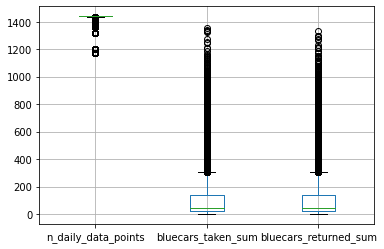

In [16]:
#checking for outliers
columns = ['n_daily_data_points',	'bluecars_taken_sum',	'bluecars_returned_sum']
autolib_df.boxplot(columns)

The outliers identified are relevant to the analysis to be conducted. Therefore, no need to remove them.

In [17]:
#the records on bluecars
bc_df = autolib_df[['date','postal_code','n_daily_data_points','dayofweek','day_type','bluecars_taken_sum','bluecars_returned_sum']]
bc_df

,date,postal_code,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum
0,2018-01-01,75001,1440,0,weekday,110,103
1,2018-01-02,75001,1438,1,weekday,98,94
2,2018-01-03,75001,1439,2,weekday,138,139
3,2018-01-04,75001,1320,3,weekday,104,104
4,2018-01-05,75001,1440,4,weekday,114,117
...,...,...,...,...,...,...,...
16080,2018-06-15,95880,1440,4,weekday,15,10
16081,2018-06-16,95880,1440,5,weekend,19,19
16082,2018-06-17,95880,1440,6,weekend,33,35
16083,2018-06-18,95880,1440,0,weekday,11,14


In [18]:
bc_df.set_index('date')

,postal_code,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum
date,,,,,,
2018-01-01,75001,1440,0,weekday,110,103
2018-01-02,75001,1438,1,weekday,98,94
2018-01-03,75001,1439,2,weekday,138,139
2018-01-04,75001,1320,3,weekday,104,104
2018-01-05,75001,1440,4,weekday,114,117
...,...,...,...,...,...,...
2018-06-15,95880,1440,4,weekday,15,10
2018-06-16,95880,1440,5,weekend,19,19
2018-06-17,95880,1440,6,weekend,33,35


In [19]:
bc_df.columns

Index(['date', 'postal_code', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum'],
      dtype='object')

In [22]:
#bluecars records on weekdays
bc_wk = bc_df[bc_df['day_type']== 'weekday']
bc_wk

,date,postal_code,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum
0,2018-01-01,75001,1440,0,weekday,110,103
1,2018-01-02,75001,1438,1,weekday,98,94
2,2018-01-03,75001,1439,2,weekday,138,139
3,2018-01-04,75001,1320,3,weekday,104,104
4,2018-01-05,75001,1440,4,weekday,114,117
...,...,...,...,...,...,...,...
16078,2018-06-13,95880,1440,2,weekday,12,13
16079,2018-06-14,95880,1439,3,weekday,15,13
16080,2018-06-15,95880,1440,4,weekday,15,10
16083,2018-06-18,95880,1440,0,weekday,11,14


# 6. Exploratory Data Analysis

i.) Univariate Analysis

In [26]:
# Checking data descriptive statistics

bc_wk.describe()

,postal_code,n_daily_data_points,dayofweek,bluecars_taken_sum,bluecars_returned_sum
count,11544.000000,11544.000000,11544.000000,11544.000000,11544.000000
mean,88789.959286,1430.007277,1.973926,116.028673,115.639380
std,7647.995374,36.882140,1.417797,169.626905,168.344751
min,75001.000000,1174.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,18.000000,19.000000
50%,92340.000000,1440.000000,2.000000,42.000000,42.000000
75%,93400.000000,1440.000000,3.000000,126.000000,126.000000
max,95880.000000,1440.000000,4.000000,1093.000000,1056.000000


In [28]:
# Finding the mean
bc_wk[['n_daily_data_points','bluecars_taken_sum','bluecars_returned_sum']].mean()

n_daily_data_points      1430.007277
bluecars_taken_sum        116.028673
bluecars_returned_sum     115.639380
dtype: float64

In [29]:
# Finding the standard deviation
n_col = ['n_daily_data_points','bluecars_taken_sum','bluecars_returned_sum']
for column in n_col:
  print('\n')
  print(column + ', Standard deviation: '+ str(bc_wk[column].std()))
  print(column + ', Variance: '+ str(bc_wk[column].var()))
  print(column + ', Skewness: '+ str(bc_wk[column].skew()))
  print(column + ', Kurtosis: '+ str(bc_wk[column].kurt()))



n_daily_data_points, Standard deviation: 36.88213992449968
n_daily_data_points, Variance: 1360.2922454103737
n_daily_data_points, Skewness: -5.449575600011862
n_daily_data_points, Kurtosis: 31.654407529009344


bluecars_taken_sum, Standard deviation: 169.62690469970084
bluecars_taken_sum, Variance: 28773.286798001394
bluecars_taken_sum, Skewness: 2.3281979815185876
bluecars_taken_sum, Kurtosis: 5.553808116768028


bluecars_returned_sum, Standard deviation: 168.34475125432746
bluecars_returned_sum, Variance: 28339.955274881388
bluecars_returned_sum, Skewness: 2.3289726516394973
bluecars_returned_sum, Kurtosis: 5.5428632223425325


In [30]:
# Interquantile range

for column in n_col:
  print('\n')
  print(bc_wk[column].quantile([0.25, 0.5, 0.75]))



0.25    1439.0
0.50    1440.0
0.75    1440.0
Name: n_daily_data_points, dtype: float64


0.25     18.0
0.50     42.0
0.75    126.0
Name: bluecars_taken_sum, dtype: float64


0.25     19.0
0.50     42.0
0.75    126.0
Name: bluecars_returned_sum, dtype: float64


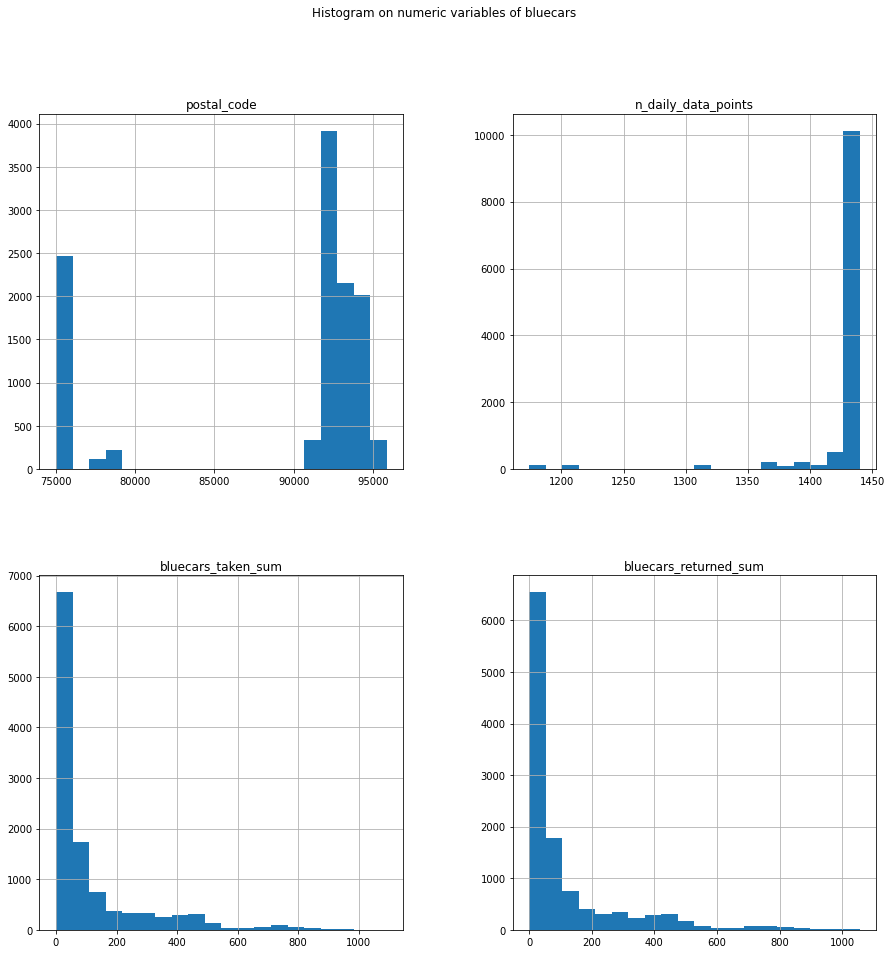

In [25]:
# Plotting our numerical variables on histogram to see the distribution
bc_wk.drop(['day_type','dayofweek'],axis=1).hist(bins=20, figsize=(15,15))
plt.suptitle("Histogram on numeric variables of bluecars")
plt.savefig('Bluecars Histogram')
plt.show()


ii.) Bivariate Analysis

In [31]:
#correlation between variables
correlation = bc_wk.corr()
correlation

,postal_code,n_daily_data_points,dayofweek,bluecars_taken_sum,bluecars_returned_sum
postal_code,1.000000,0.000174,0.000130,-0.701709,-0.701877
n_daily_data_points,0.000174,1.000000,-0.094702,0.026295,0.026691
dayofweek,0.000130,-0.094702,1.000000,0.030798,0.028943
bluecars_taken_sum,-0.701709,0.026295,0.030798,1.000000,0.998780
bluecars_returned_sum,-0.701877,0.026691,0.028943,0.998780,1.000000


There is a strong positive correlation between the bluecars taken and the blucars return. An increase in the bluecars taken influences an increase in the bluecars returned by 99%.

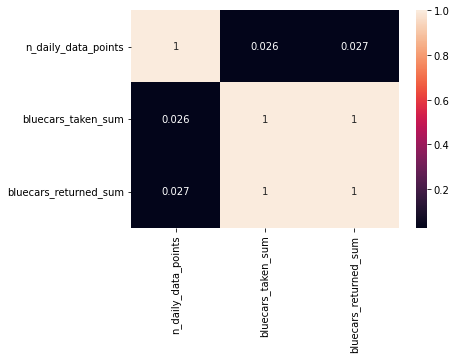

In [32]:
 # heatmap to show correlation 

sns.heatmap(bc_wk[n_col].corr(), annot=True);


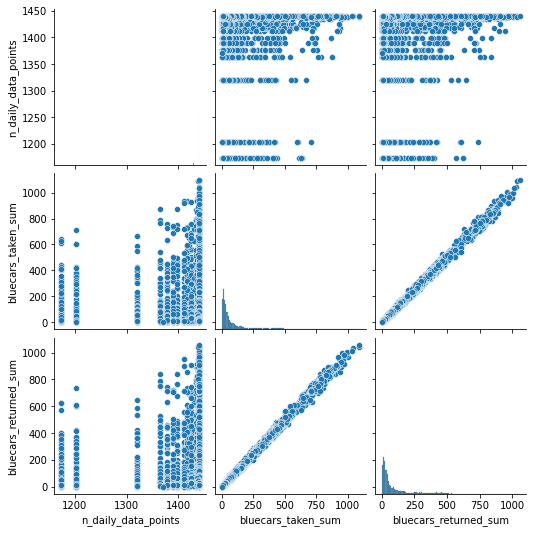

In [33]:
#pairplot
sns.pairplot(bc_wk[n_col]);
plt.show()

The bluecars taken and the bluecars returned have a positive correlation

# 7. Data Sampling

The sampling method to use is stratified sampling because it best represents the entire population being studied.

In [23]:
 #Stratified sample
strat_output = bc_wk.groupby('postal_code', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))

# proportion of the non_stratified sample
print(strat_output['postal_code'].value_counts())

# Check the stratified output
print(strat_output)


92150    11
94700    11
92400    11
94450    11
92410    11
         ..
92160    11
92340    10
93370    10
93200     9
93390     6
Name: postal_code, Length: 104, dtype: int64
            date  postal_code  ...  bluecars_taken_sum  bluecars_returned_sum
70    2018-03-15        75001  ...                 134                    135
123   2018-05-07        75001  ...                 118                    115
15    2018-01-16        75001  ...                 116                    116
24    2018-01-25        75001  ...                 130                    130
29    2018-01-30        75001  ...                 103                    103
...          ...          ...  ...                 ...                    ...
15936 2018-01-08        95880  ...                   4                      9
15974 2018-02-15        95880  ...                  10                     11
15954 2018-01-26        95880  ...                   9                      7
16058 2018-05-24        95880  ...         

In [34]:
#checking the size of the sample
strat_output.shape

(1135, 7)

The sample has 1135 rows and 7 columns

#7. Normality Test

Normality test is conducted to evaluate whether the distribution is normally distributed or not

In [36]:
#testing for normality for n_daily_data points
from scipy.stats import shapiro 
stat, p = shapiro(strat_output['n_daily_data_points'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.025
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')
# testing for normality for n_daily_data

stat, p = shapiro(strat_output['n_daily_data_points'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.025
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')
  

Statistics=0.303, p=0.000
Sample does not look Gaussian
Statistics=0.303, p=0.000
Sample does not look Gaussian


In [37]:
#testing for normality for bluecars taken
from scipy.stats import shapiro 
stat, p = shapiro(strat_output['bluecars_taken_sum'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.025
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')
# testing for normality 

stat, p = shapiro(strat_output['bluecars_taken_sum'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.025
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')
  

Statistics=0.668, p=0.000
Sample does not look Gaussian
Statistics=0.668, p=0.000
Sample does not look Gaussian


In [38]:
#testing for normality for blucars returned
from scipy.stats import shapiro 
stat, p = shapiro(strat_output['bluecars_returned_sum'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.025
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')
# testing for normality 

stat, p = shapiro(strat_output['bluecars_returned_sum'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.025
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')
  

Statistics=0.668, p=0.000
Sample does not look Gaussian
Statistics=0.668, p=0.000
Sample does not look Gaussian


The daily data points, bluecars taken and bluecars returned are not normally distributed

# 8. Hypothesis Testing

H0: The mean of daily data points is 1430.

H1: The mean of daily data points is not equal to 1430

Level of significance, alpha = 0.025. This is because this is a two-sided test.

In [39]:
#population mean for crs taken and returned
bc_wk['bluecars_returned_sum'].mean()
bc_wk['bluecars_taken_sum'].mean()

116.0286729036729

In [40]:
#getting the sample mean for cars taken and returned
strat_output['bluecars_returned_sum'].mean()
strat_output['bluecars_taken_sum'].mean()

115.2079295154185

In [47]:
#population mean on daily data points
pm = bc_wk['n_daily_data_points'].mean()
pm

1430.0072765072764

In [50]:
bc_wk['n_daily_data_points'].max()


1440

In [51]:
bc_wk['n_daily_data_points'].min()


1174

In [46]:
#sample mean on daily data points
sm = strat_output['n_daily_data_points'].mean()
sm

1429.6590308370044

In [45]:
#standard deviation of daily data points
sd = bc_wk['n_daily_data_points'].std()
sd

36.88213992449968

In [48]:
#zscore on daily data points
zscore = (1429.65- 1430.00)/36.88
zscore

-0.009490238611711199

In [49]:
#calculating the p-value from the zscore
from scipy.stats import norm
p = norm.cdf(zscore)
p

0.4962139993975654

Since the p-value is greater than alpha, we fail to reject the null hypothesis and conclude that the mean of daily data points is 1430.

# CONCLUSION

Since the minimum value of the daily points is 1174 and the maximum value is 1440, we conclude that a relatively higher number of cars taken are returned. This is because the daily points are determined by the returned cars.